In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from netCDF4 import Dataset

sys.path.append(r'C:\Users\chral\Nextcloud\code\HIDA2020\Climate_Model_Data')
from common import *

In [46]:
os.chdir(r'C:\Users\chral\Dropbox\ipp\HIDA2020')

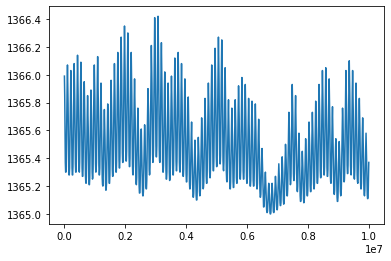

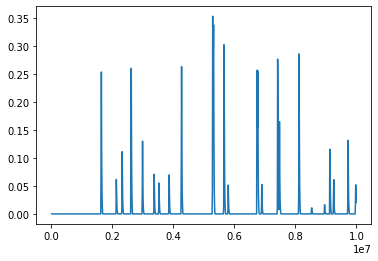

In [47]:
t, TSI = get_solar_data()
t, AOD = get_volcanic_data()

plt.figure()
plt.plot(t, TSI)
plt.figure()
plt.plot(t, AOD)

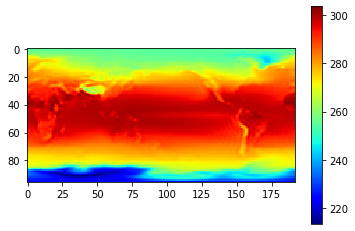

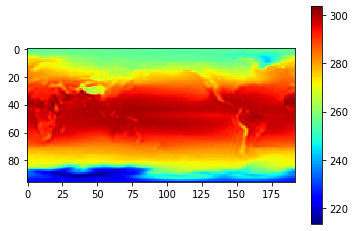

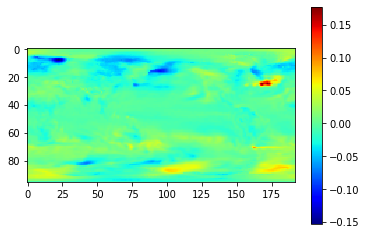

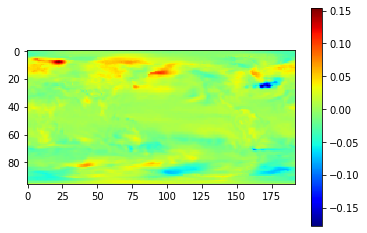

In [48]:
# Load temperature data
# The mean over time differs by less than 0.05% locally, so this is a good basis

t, lon, lat, T1 = get_geodata(1)
t, lon, lat, T2 = get_geodata(2)
T1_mean = np.mean(T1, 0)
T2_mean = np.mean(T2, 0)
T_mean = (T1_mean + T2_mean)/2.0
plt.figure()
plt.imshow(T1_mean, cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(T2_mean, cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(T1_mean-T_mean, cmap='jet')
plt.colorbar()
plt.figure()
plt.imshow(T2_mean-T_mean, cmap='jet')
plt.colorbar()

In [49]:
tropics = np.where(np.logical_and(lat > -23.43666, lat < 23.43666))[0]

In [50]:
plt.imshow(T2m_1_mean[tropics,:], cmap='jet')

NameError: name 'T2m_1_mean' is not defined

In [ ]:
T1_ts = np.mean(np.mean(T1, 2), 1)
T2_ts = np.mean(np.mean(T2, 2), 1)

T1_tropics = T1[:,tropics,:]
T2_tropics = T2[:,tropics,:]

T1_tropics_ts = np.mean(np.mean(T1_tropics, 2), 1)
T2_tropics_ts = np.mean(np.mean(T2_tropics, 2), 1)


plt.figure()
plt.plot(T1_tropics_ts-np.mean(T1_tropics_ts))
plt.plot(T2_tropics_ts-np.mean(T2_tropics_ts))
plt.plot(AOD/np.max(AOD))
plt.xlabel('t / years')
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs volcanic forcing')


plt.figure()
plt.plot(T1_tropics_ts-np.mean(T1_tropics_ts))
plt.plot(T2_tropics_ts-np.mean(T2_tropics_ts))
plt.plot(AOD/np.max(AOD))
plt.xlabel('t / years')
plt.xlim([400, 600])
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs volcanic forcing')


In [ ]:
def normalize(x):
    return (x-np.mean(x))/np.std(x)

plt.figure()
plt.plot(normalize(T1_tropics_ts))
plt.plot(normalize(T2_tropics_ts))
plt.plot(normalize(TSI), alpha=0.6)
plt.xlabel('t / years')
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs solar forcing')

plt.figure()
plt.plot(normalize(T1_tropics_ts))
plt.plot(normalize(T2_tropics_ts))
plt.plot(normalize(TSI), alpha=0.6)
plt.xlabel('t / years')
plt.legend(['T1', 'T2', 'forcing'])
plt.title('Mean tropical temperature vs solar forcing')

Text(0.5, 1.0, 'Solar forcing in frequency space')

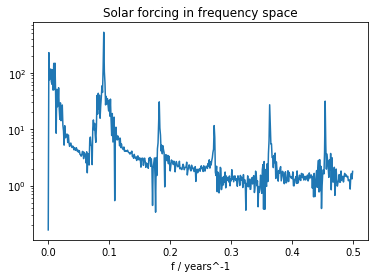

In [53]:
TSI_f = np.fft.rfft(normalize(TSI))
f = np.fft.fftfreq(len(TSI))[0:500]
plt.semilogy(f, np.abs(TSI_f))
plt.xlabel('f / years^-1')
plt.title('Solar forcing in frequency space')

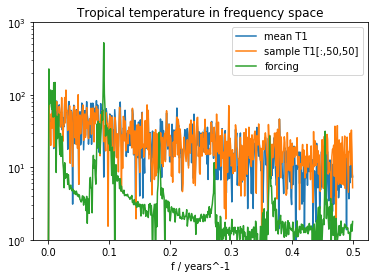

In [54]:
T1_tropics_f = np.fft.rfft(normalize(T1_tropics_ts))
T1_sample_f = np.fft.rfft(normalize(T1[:, 50, 50]))
plt.semilogy(f, np.abs(T1_tropics_f))
plt.semilogy(f, np.abs(T1_sample_f))
plt.semilogy(f, np.abs(TSI_f))
plt.xlabel('f / years^-1')
#plt.xlim([0.0, 0.15])
plt.ylim([1e0, 1e3])
plt.title('Tropical temperature in frequency space')
plt.legend(['mean T1', 'sample T1[:,50,50]', 'forcing'])

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     187.2
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           7.79e-33
Time:                        19:22:32   Log-Likelihood:                -471.48
No. Observations:                 276   AIC:                             947.0
Df Residuals:                     274   BIC:                             954.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        779.5514     57.261     13.614      0.000     666.824     892.279
x

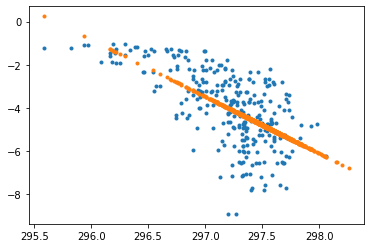

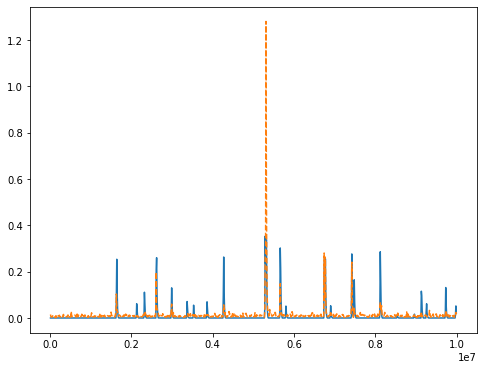

In [55]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

AODmin = 1e-10
t, AOD = get_volcanic_data()

x = np.concatenate([np.roll(T1_tropics_ts[AOD>AODmin], -1), np.roll(T2_tropics_ts[AOD>AODmin], -1)])
X = sm.add_constant(x)
y = np.log(np.concatenate([AOD[AOD>AODmin],AOD[AOD>AODmin]]))

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

xpl = np.roll(T1_tropics_ts, -1)
Xpl = sm.add_constant(xpl)
ypred = fit.predict(Xpl)

plt.figure()
plt.plot(x, y, '.')
plt.plot(xpl, ypred, '.')


fig, ax = plt.subplots(figsize=(8,6))

ax.plot(t, AOD, '-')
ax.plot(t, np.exp(ypred), '--')
plt.show()


In [56]:
# to check lags
# x = np.vstack([
#     np.roll(T1_tropics_ts[AOD>AODmin], 2),
#     np.roll(T1_tropics_ts[AOD>AODmin], 1),
#     T1_tropics_ts[AOD>AODmin], 
#     np.roll(T1_tropics_ts[AOD>AODmin], -1), 
#     np.roll(T1_tropics_ts[AOD>AODmin], -2), 
#     np.roll(T1_tropics_ts[AOD>AODmin], -3), 
#     np.roll(T1_tropics_ts[AOD>AODmin], -4)]).T

OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     181.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           4.07e-32
Time:                        19:22:33   Log-Likelihood:                -473.13
No. Observations:                 276   AIC:                             950.3
Df Residuals:                     274   BIC:                             957.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        974.0200     72.548     13.426      0.000     831.198    1116.842
x

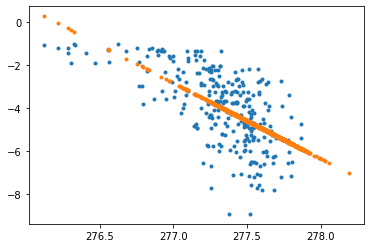

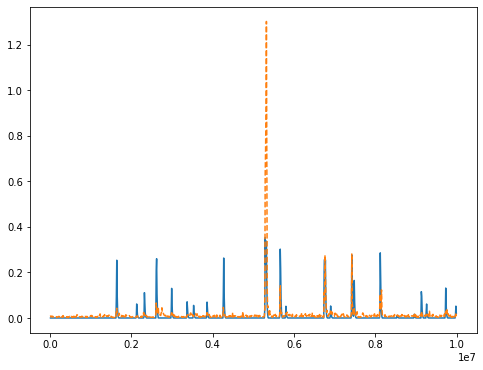

In [57]:
AODmin = 1e-10
t, AOD = get_volcanic_data()

x = np.concatenate([np.roll(T1_ts[AOD>AODmin], -1), np.roll(T2_ts[AOD>AODmin], -1)])
X = sm.add_constant(x)
y = np.log(np.concatenate([AOD[AOD>AODmin],AOD[AOD>AODmin]]))

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

xpl = np.roll(T1_ts, -1)
Xpl = sm.add_constant(xpl)
ypred = fit.predict(Xpl)

plt.figure()
plt.plot(x, y, '.')
plt.plot(xpl, ypred, '.')


fig, ax = plt.subplots(figsize=(8,6))

ax.plot(t, AOD, '-')
ax.plot(t, np.exp(ypred), '--')
plt.show()


OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.844
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.46e-08
Time:                        19:22:34   Log-Likelihood:                -132.75
No. Observations:                 861   AIC:                             287.5
Df Residuals:                     850   BIC:                             339.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1167.9589     29.393     39.736      0.000    1110.268    1225.650
x

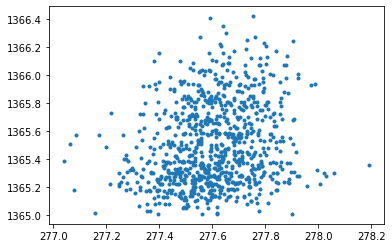

In [58]:
x = np.vstack([
     np.roll(T1_ts[AOD<AODmin], 2),
     np.roll(T1_ts[AOD<AODmin], 1),
     T1_ts[AOD<AODmin], 
     np.roll(T1_ts[AOD<AODmin], -1), 
     np.roll(T1_ts[AOD<AODmin], -2), 
     np.roll(T1_ts[AOD<AODmin], -3), 
     np.roll(T1_ts[AOD<AODmin], -4), 
     np.roll(T1_ts[AOD<AODmin], -5), 
     np.roll(T1_ts[AOD<AODmin], -6), 
     np.roll(T1_ts[AOD<AODmin], -7)]).T
X = sm.add_constant(x)
y = TSI[AOD<AODmin]

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

xpl = np.roll(T1_ts, -1)
Xpl = sm.add_constant(xpl)
#ypred = fit.predict(Xpl)

plt.figure()
plt.plot(x[:,-1], y, '.')
#plt.plot(xpl, ypred, '.')


# fig, ax = plt.subplots(figsize=(8,6))

# ax.plot(t, AOD, '-')
# ax.plot(t, np.exp(ypred), '--')
# plt.show()

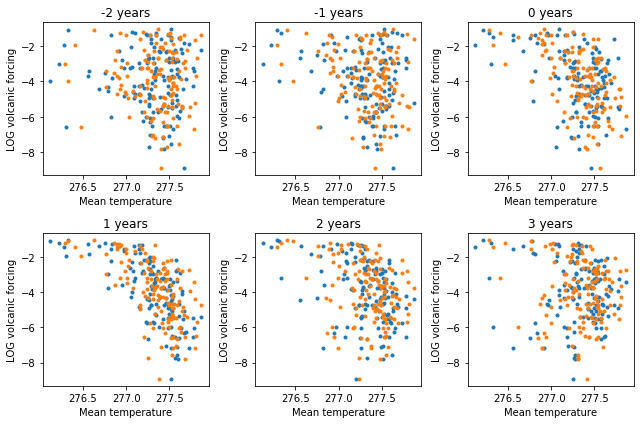

In [59]:
y = np.log(AOD[AOD>AODmin])

plt.figure(figsize=(9, 6))
for lag in range(-2, 4):
    xA = np.roll(T1_ts[AOD>AODmin], -lag)
    xB = np.roll(T2_ts[AOD>AODmin], -lag)
    plt.subplot(2, 3, lag+3)
    plt.plot(xA, y, '.')
    plt.plot(xB, y, '.')
    plt.xlabel('Mean temperature')
    plt.ylabel('LOG volcanic forcing')
    plt.title('{} years'.format(lag))
plt.tight_layout()


Text(0.5, 1.0, 'Global mean temperature')

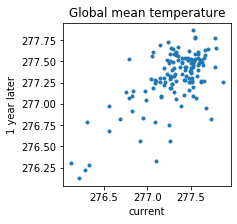

In [60]:
plt.figure(figsize=(3, 3))
plt.plot(T1_ts[AOD>AODmin][:-1], np.roll(T1_ts[AOD>AODmin], -1)[:-1], '.')
plt.xlabel('current')
plt.ylabel('1 year later')
plt.title('Global mean temperature')

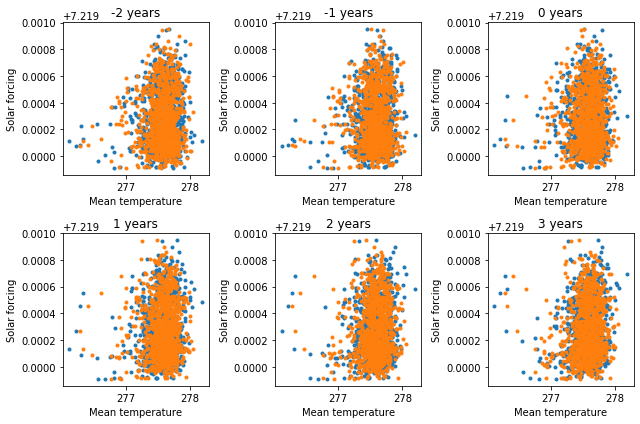

In [61]:
y = np.log(TSI)

plt.figure(figsize=(9, 6))
for lag in range(-2, 4):
    xA = np.roll(T1_ts, -lag)
    xB = np.roll(T2_ts, -lag)
    plt.subplot(2, 3, lag+3)
    plt.plot(xA, y, '.')
    plt.plot(xB, y, '.')
    plt.xlabel('Mean temperature')
    plt.ylabel('Solar forcing')
    plt.title('{} years'.format(lag))
plt.tight_layout()

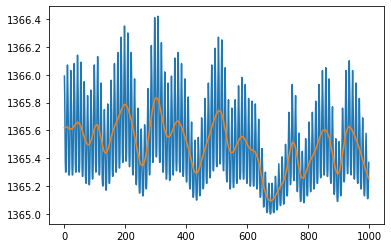

In [62]:
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html

from scipy.ndimage import gaussian_filter

TSI_sm = gaussian_filter(TSI, 6)

plt.figure()
plt.plot(TSI)
plt.plot(TSI_sm)

In [63]:
y = TSI_sm

plt.figure(figsize=(9, 6))
for lag in range(-2, 4):
    xA = np.roll(T1_ts, -lag)
    xB = np.roll(T2_ts, -lag)
    plt.subplot(2, 3, lag+3)
    plt.plot(xA, y, '.')
    plt.plot(xB, y, '.')
    plt.xlabel('Mean temperature')
    plt.ylabel('Solar forcing')
    plt.title('{} years'.format(lag))
plt.tight_layout()


Text(0, 0.5, 'Solar forcing')

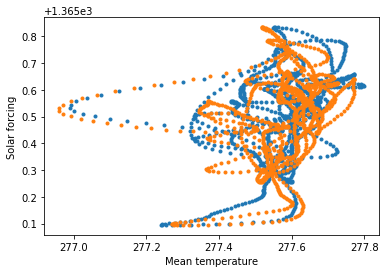

In [64]:
y = TSI_sm
T1_ts_sm = gaussian_filter(T1_ts, 6)
T2_ts_sm = gaussian_filter(T2_ts, 6)
xA = T1_ts_sm
xB = T2_ts_sm

plt.figure()
plt.plot(xA, y, '.')
plt.plot(xB, y, '.')
plt.xlabel('Mean temperature')
plt.ylabel('Solar forcing')


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow
from gpflow.utilities import set_trainable, print_summary


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤════════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value              │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪════════════════════╡
│ GPR.mean_function.A     │ Parameter │                  │         │ True        │ (1, 1)  │ float64 │ [[1.]]             │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────────┤
│ GPR.mean_function.b     │ Parameter │                  │         │ True        │ (1,)    │ float64 │ [0.]               │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────────┤
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ False       │ ()      │ float64 │ 300.2315809003573  │
├───────

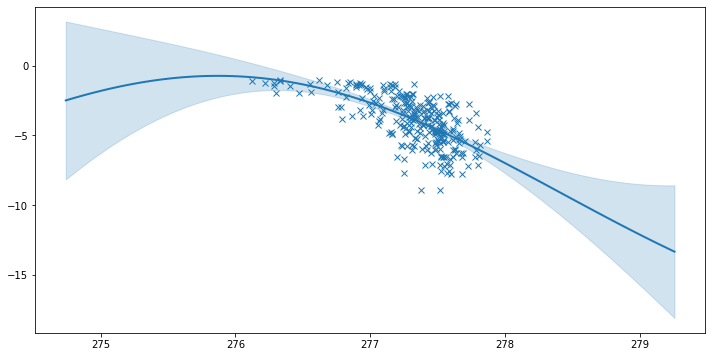

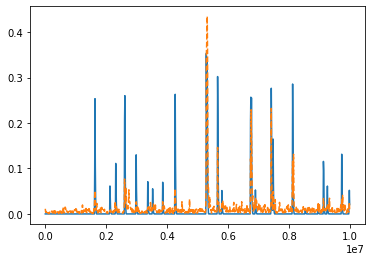

In [80]:
AODmin = 1e-10
t, AOD = get_volcanic_data()

x = np.concatenate([np.roll(T1_ts[AOD>AODmin], -1), np.roll(T2_ts[AOD>AODmin], -1)]).astype('float64')
y = np.log(np.concatenate([AOD[AOD>AODmin],AOD[AOD>AODmin]])).astype('float64')
xtrain = x.reshape([-1,1])
ytrain = y.reshape([-1,1])

k = gpflow.kernels.SquaredExponential(variance=1e2*np.var(ytrain))
meanf = gpflow.mean_functions.Linear()
m = gpflow.models.GPR(data=(xtrain, ytrain), kernel=k, noise_variance=np.var(ytrain), mean_function=meanf)
opt = gpflow.optimizers.Scipy()

set_trainable(m.kernel.variance, False)
#set_trainable(m.mean_function.c, False)

print_summary(m)

def objective_closure():
    return - m.log_marginal_likelihood()

opt_logs = opt.minimize(objective_closure,
                        m.trainable_variables,
                        options=dict(maxiter=100))

print_summary(m)

xpl = np.linspace(0.995*np.min(xtrain), 1.005*np.max(xtrain), 100).reshape([-1, 1]).astype('float64')
mean, var = m.predict_f(xpl)

plt.figure(figsize=(12, 6))
plt.plot(xtrain, ytrain, 'x')
plt.plot(xpl, mean, 'C0', lw=2)
plt.fill_between(xpl[:, 0],
                 mean[:, 0] - 1.96 * np.sqrt(var[:,0]),
                 mean[:, 0] + 1.96 * np.sqrt(var[:,0]),
                 color='C0', alpha=0.2)

xpl = np.roll(T1_ts, -1).reshape([-1, 1]).astype('float64')
ypred, var = m.predict_f(xpl)
plt.figure()
plt.plot(t, AOD, '-')
plt.plot(t, np.exp(ypred), '--')

In [78]:
xpl.dtype

dtype('float32')

In [67]:
AOD

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.0000

In [ ]:
AOD.filled()